In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import pandas as pd
import numpy as np
import matplotlib
import warnings
import csv

In [3]:
sns.set(style="white", color_codes=True)
warnings.filterwarnings("ignore")

In [4]:
url = 'http://dados.ufes.br/dataset/37ba75f0-333d-475a-b60a-8b87ac7e2129/resource/2de89c23-2580-4fff-a02b-e82642970dcd/download/alunos.csv'
raw_data = urllib.request.urlopen(url)
names=['ALUNOS', 'CURSO', 'PERÍODO DE INSCRIÇÃO', 'ANO DE INSCRIÇÃO']

In [5]:
dataset = pd.read_csv(raw_data, header=None, sep=',', names=names)

In [6]:
dataset.head()

,ALUNOS,CURSO,PERÍODO DE INSCRIÇÃO,ANO DE INSCRIÇÃO
0,NOME DO ALUNO,CURSO,PERÍODO DE INGRESSO,ANO DE INGRESSO
1,CECILIA GOMES NETA,Serviço Social,1º Semestre,2015
2,ABDA RIBEIRO GRASSIOTI BELO,Administração - Noturno,1º Semestre,2016
3,ABDERREHMANE ABOUKA,Aluno Especial - Mobilidade Estudantil,2º Semestre,2019
4,ABDIEL DE ALMEIDA REIS,Administração - Noturno,2º Semestre,2018


In [7]:
df = pd.DataFrame(data=dataset, columns=names)
df = df.iloc[1:]
df

,ALUNOS,CURSO,PERÍODO DE INSCRIÇÃO,ANO DE INSCRIÇÃO
1,CECILIA GOMES NETA,Serviço Social,1º Semestre,2015
2,ABDA RIBEIRO GRASSIOTI BELO,Administração - Noturno,1º Semestre,2016
3,ABDERREHMANE ABOUKA,Aluno Especial - Mobilidade Estudantil,2º Semestre,2019
4,ABDIEL DE ALMEIDA REIS,Administração - Noturno,2º Semestre,2018
5,ABDIEL VENTURA ROCHA,Ciências Econômicas - Bacharelado,2º Semestre,2019
...,...,...,...,...
25577,ZIBIA DA SILVA AMARO,Educação Física - Licenciatura,1º Semestre,2019
25578,ZORAIDE DANGREMON DE ALMEIDA PEREIRA,Física - Licenciatura - Alegre,2º Semestre,2018
25579,ZUELZER HENRIQUE BESSA DE FARIA,Engenharia Elétrica,2º Semestre,2019
25580,ZULEIA DOS REIS SOUZA,Pedagogia - São Mateus,1º Semestre,2015


In [8]:
features = ['ALUNOS', 'PERÍODO DE INSCRIÇÃO', 'ANO DE INSCRIÇÃO']
labels = ['CURSO']

label_encoder = preprocessing.LabelEncoder() 

df['ALUNOS'] = label_encoder.fit_transform(df['ALUNOS']) 
df['PERÍODO DE INSCRIÇÃO'] = label_encoder.fit_transform(df['PERÍODO DE INSCRIÇÃO'])
df['ANO DE INSCRIÇÃO'] = label_encoder.fit_transform(df['ANO DE INSCRIÇÃO']) 

X = df[features]
y = df[labels]

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.43, random_state=42)

In [10]:
df['CURSO'].value_counts()

Direito                                                        604
Medicina                                                       474
Engenharia Elétrica                                            473
Administração - Noturno                                        460
Ciências Contábeis                                             455
                                                              ... 
Arquivologia                                                     9
Biblioteconomia Bacharelado - EAD                                1
Artes Visuais - EAD                                              1
Ciência da Computação - Ênfase em Sistemas de Informação         1
Pedagogia Séries Inciais do Ensino Fundamental (Lic.) - EAD      1
Name: CURSO, Length: 135, dtype: int64

In [14]:
clf = GaussianNB()

model = clf.fit(features_train, labels_train)

pred = model.predict(features_test)

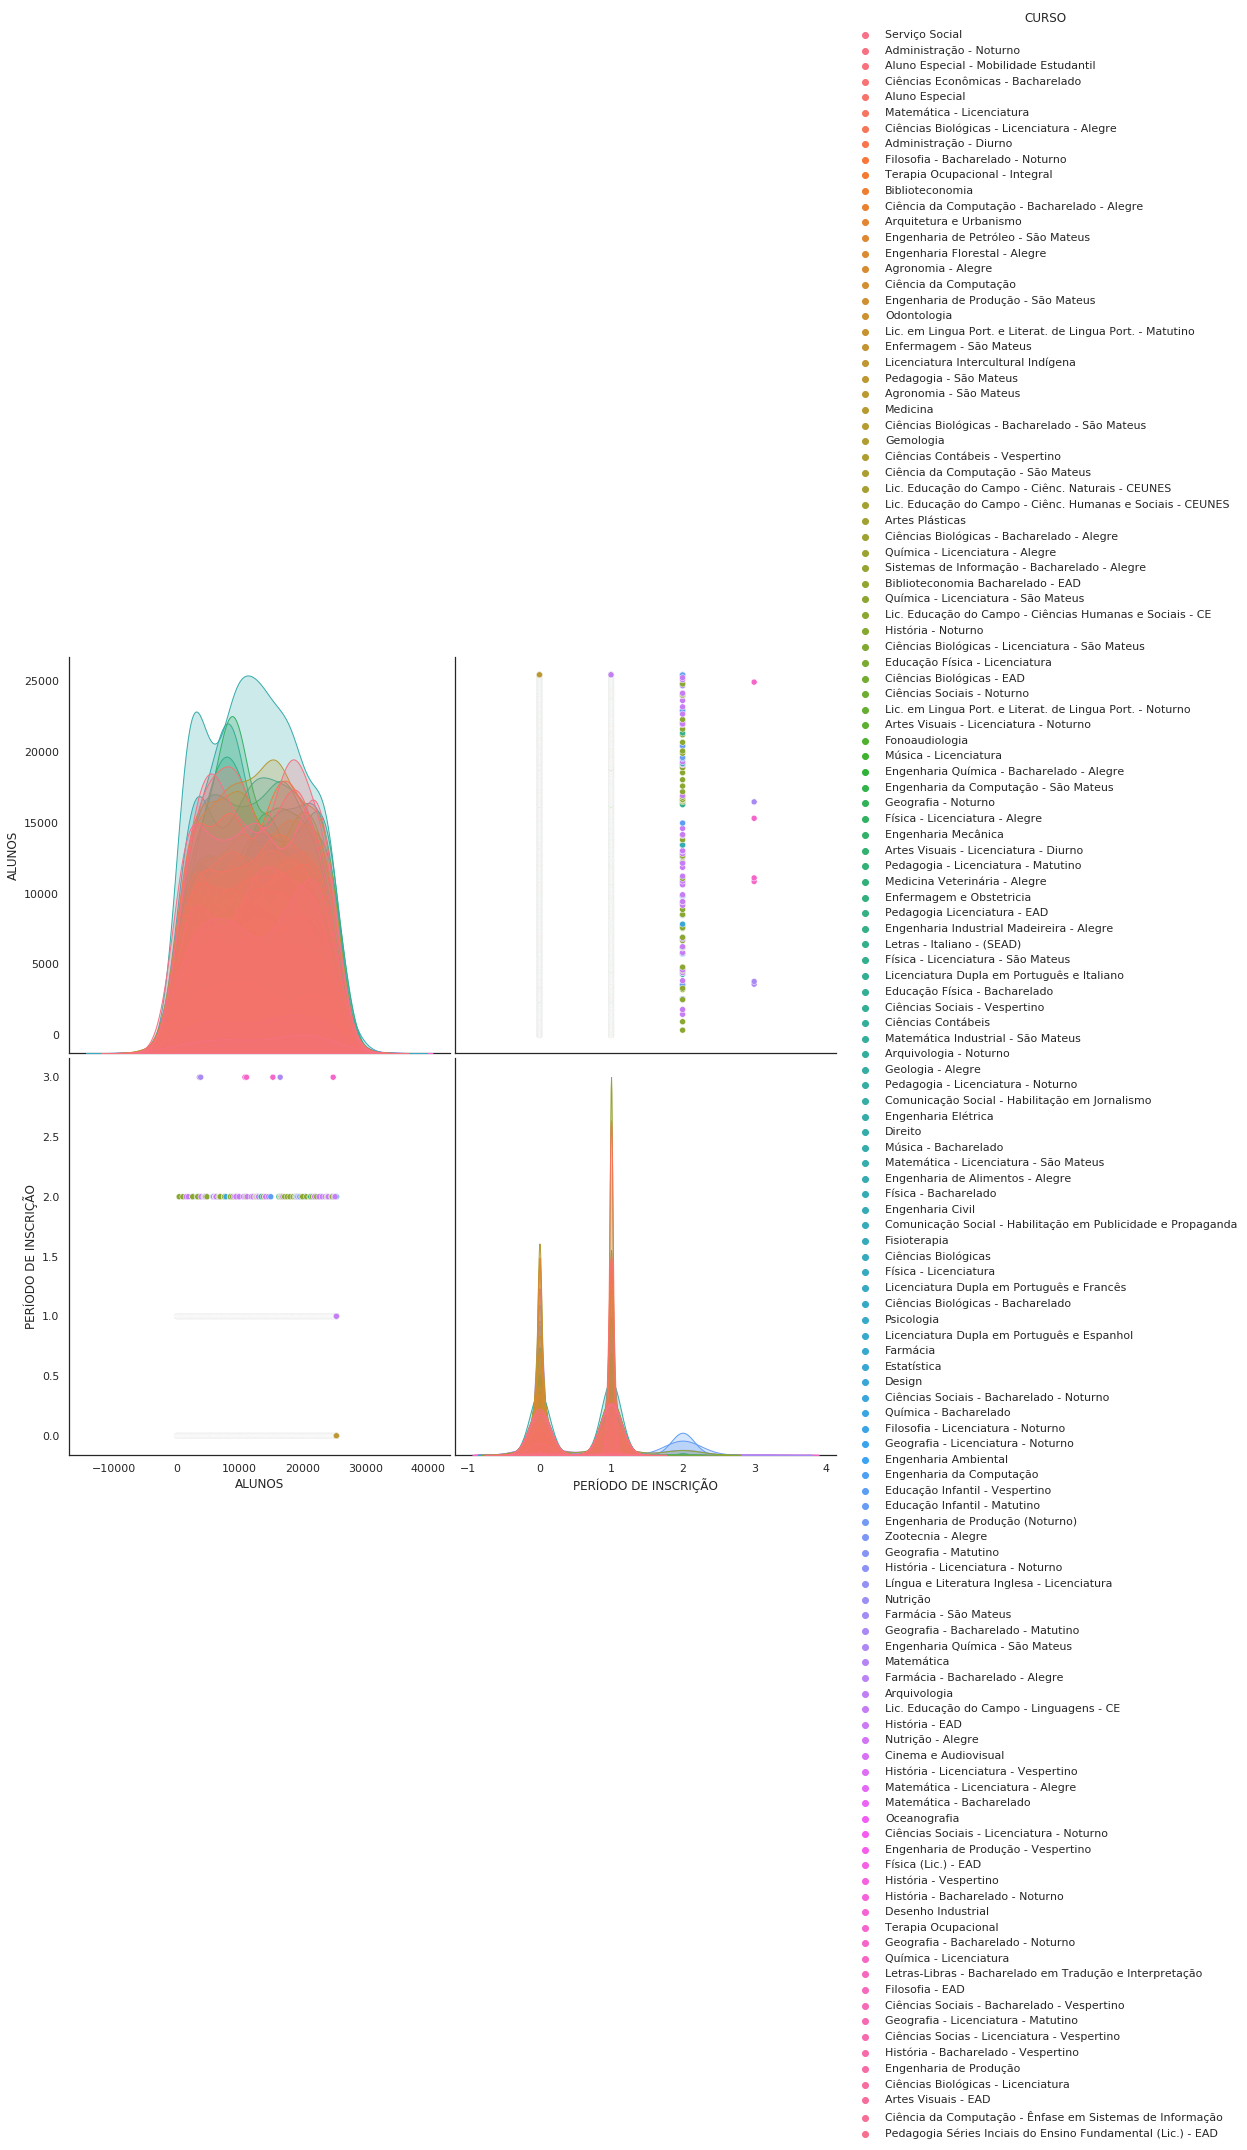

In [12]:
%matplotlib inline

diagram = sns.pairplot(df.drop("ANO DE INSCRIÇÃO", axis=1), hue="CURSO", size=6, diag_kind="kde")

plt.savefig('output.png', bbox_inches='tight', dpi=300)